# 训练和可视化决策树

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [4]:
# https://dreampuf.github.io/GraphvizOnline
# 在这个网站将 iris_tree.dot 中的内容输入进去可视化决策树

from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
# out_file=image_path("iris_tree.dot"),
out_file="iris_tree.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

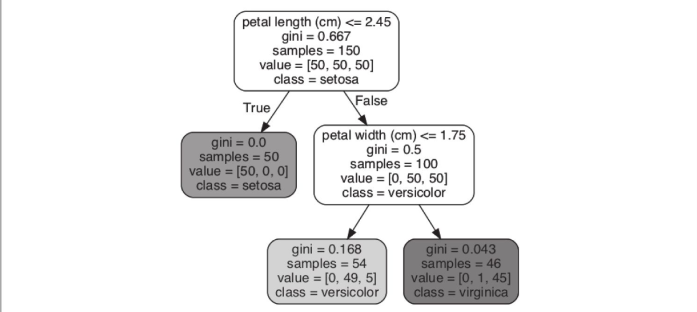

In [ ]:
# 节点的samples属性统计它应用的训练实例数量
# 节点的value属性说明了该节点上每个类别的训练实例数量
# 节点的gini属性衡量其不纯度（impurity）
# 基尼系数等于 1–（0/54）2–（49/54）2–（5/54）2≈0.168

$$G_i=1-\sum_{k=1}^np_{i,k}^2$$

# 估计类概率

In [5]:
# 返回该节点中类k的训练实例占比
# 山鸢尾花，0%（0/54）；
# 变色鸢尾花，90.7%（49/54）；
# 维吉尼亚鸢尾花，9.3%（5/54）；
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

# CART训练算法

成本函数:$$J(k,t_k)=\frac{m_{\mathrm{leff}}}mG_{\mathrm{leff}}+\frac{m_{\mathrm{right}}}mG_{\mathrm{right}}$$
$G_\mathrm{left/right}$测量左右子集的不纯度

$m_\mathrm{left/right}$测量左右子集的实例数 

In [ ]:
# 首先使用单个特征k和阈值tk
# （例如，“花瓣长度”≤2.45cm”）将训练集分为两个子集。
# 如何选择k和tk？它搜索产生最纯子集（按其大小加权）的一对（k，tk）

# 大概是：对每个k的都进行一次成本函数计算（对每个实例都进行计算），
# 然后最小的成本函数对应的k和tk就是当前要添加的决策边界

# 一旦CART算法成功地将训练集分为两部分，它就会使用相同的逻辑将子集进行分割，
# 然后再分割子集，以此类推。一旦达到最大深度（由超参数max_depth定义），
# 或者找不到可减少不纯度的分割，它将停止递归

# 正则化超参数

In [ ]:
# 如果不加以限制，树的结构将跟随训练集变化，严密拟合，并且很可能过拟合
# 为避免过拟合，需要在训练过程中降低决策树的自由度

# 减小max_depth可使模型正则化，从而降低过拟合的风险

# DecisionTreeClassifier类还有一些其他的参数，同样可以限制决策树的形状：
# min_samples_split（分裂前节点必须有的最小样本数）、
# min_samples_leaf（叶节点必须有的最小样本数量）、
# min_weight_fraction_leaf（与min_samples_leaf一样，但表现为加权实例总数的占比）、
# max_leaf_nodes（最大叶节点数量），
# 以及max_features（分裂每个节点评估的最大特征数量）。
# 增大超参数min_*或减小max_*将使模型正则化

# 回归